In [1]:
# run PCA of final spectral data set using the env_eosc510 environement

In [2]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [3]:
# read in data
data = pd.read_csv('PRIMSA_bands_double_norm.csv', header = 0, index_col = 0)
data = data[:229] # clipped to remove band bands 

ages = np.array(data.columns.values.astype(float)) # save ages as an array for plotting
ages = np.round(ages, 2) # round age array 
band_names = np.array(data.index.values) # save band names as an array for plotting

np.shape(data) # check shape, (rows, columns) i.e. (observations, locations/age)

In [64]:
data

,3.36999988556,5.1066699028,5.30000019073,5.40000009537,6.25,7.69000005722,11.0,11.3299999237,16.4500007629,16.4799995422,...,18.2000007629,22.0100002289,26.2999992371,30.5,31.7432994843,78.5,107.699996948,212.154006958,238.470001221,319.220001221
B1_mean,-0.028741,2.811072,-0.561462,2.353660,0.076811,1.599868,1.330293,-0.254106,1.447358,-1.131850,...,-0.880530,0.190671,0.795804,-0.185351,2.260014,-1.816870,0.580939,-0.462373,-1.572463,-1.323905
B2_mean,0.187197,2.867142,-0.456520,2.636090,0.240854,1.909389,1.506808,-0.351542,1.642148,-1.179514,...,-1.545449,0.452386,0.813336,-0.157945,2.293801,-1.806722,-0.162148,-0.561856,-1.636120,-1.280991
B3_mean,0.100953,2.843311,-0.439424,2.633212,0.234587,1.966687,1.216232,-0.291791,1.600345,-1.115631,...,-1.641266,0.378320,0.788689,-0.012470,2.278123,-1.674296,-0.331368,-0.572461,-1.636000,-1.190225
B4_mean,0.163269,2.785078,-0.393854,2.523942,0.258800,1.873852,1.273754,-0.209186,1.493746,-1.099559,...,-1.588099,0.261795,0.792764,0.039114,2.186708,-1.648269,-0.356254,-0.646254,-1.645653,-1.220847
B5_mean,-0.089037,2.658550,-0.372253,2.060546,0.279486,1.411371,1.300513,-0.019150,1.108316,-1.030743,...,-1.146324,-0.152343,0.798312,0.131998,2.055110,-1.590242,0.059930,-0.689451,-1.526520,-1.501960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B225_mean,-0.531520,-0.232515,-0.035855,-0.118702,1.913005,-0.530218,-0.908861,-0.253288,0.583865,-0.505985,...,-0.635171,-0.284803,1.767357,0.133026,0.206283,-0.289673,0.785034,0.086445,-0.565002,-1.056171
B226_mean,-0.308700,-0.147331,0.117576,0.447558,1.683551,-0.094812,-1.383272,-0.358288,1.079865,-0.496628,...,-0.610989,0.248278,1.780173,0.018021,0.175805,-0.362351,0.397996,0.019288,-0.528042,-0.742049
B227_mean,0.143108,-0.759052,0.111105,0.153284,2.283752,-0.411202,-1.518699,-0.583331,0.702295,-0.271229,...,-1.141799,0.572042,1.830104,-0.071198,-0.317438,0.159136,-0.262679,-0.128361,-0.411360,-0.365065
B228_mean,-0.855391,0.064349,-0.299244,-0.866269,1.171155,-1.255277,-0.063744,-0.004982,-0.074087,-0.375407,...,0.844834,-1.180480,1.518706,0.246747,0.353288,-0.505223,1.985014,0.259579,-0.526841,-1.961313


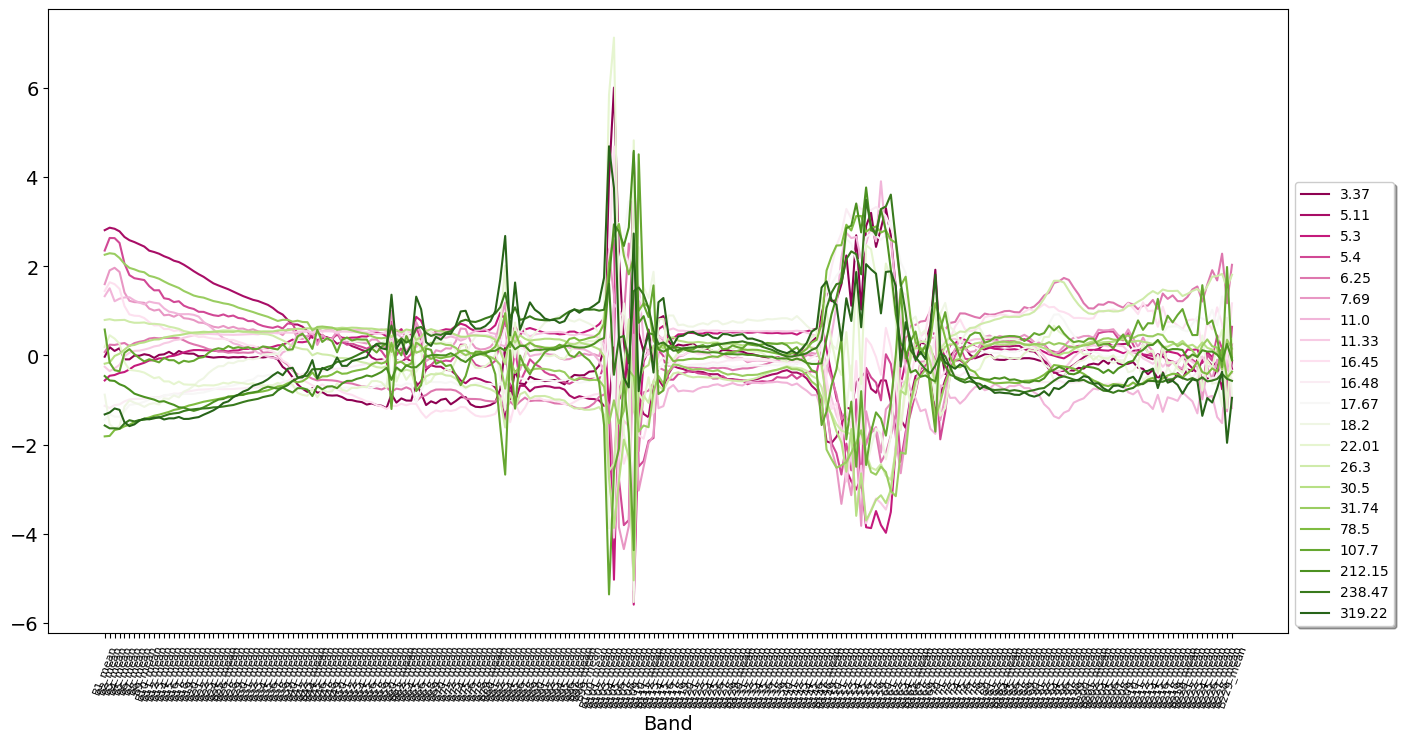

In [12]:
N = 21 # number of objects to plot i.e. color cycle count

plt.rcParams["figure.figsize"] = [16,9] # fig size
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.PiYG(np.linspace(0,1,N))) # colors to cycle through, choose default like 'viridis' or 'PiYG'

fig, ax = plt.subplots()
for i in range(N):
    ax.plot(data.T.iloc[i], label = ages[i]) # for i in range of objects, plot x,y

#plt.legend(loc = 'right')
plt.xlabel('Band', fontsize = 14)
plt.xticks(fontsize = 10, rotation=70, size = 8)
plt.yticks(fontsize = 14)

# cutum legend location
# get legend location
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='lower left', bbox_to_anchor=(1, 0),
          fancybox=True, shadow=True, ncol=1)

plt.rcdefaults() # reset global plt parameters, IMPORTANT!
plt.show()

In [58]:
data = data

n_modes = np.min(np.shape(data)) 
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

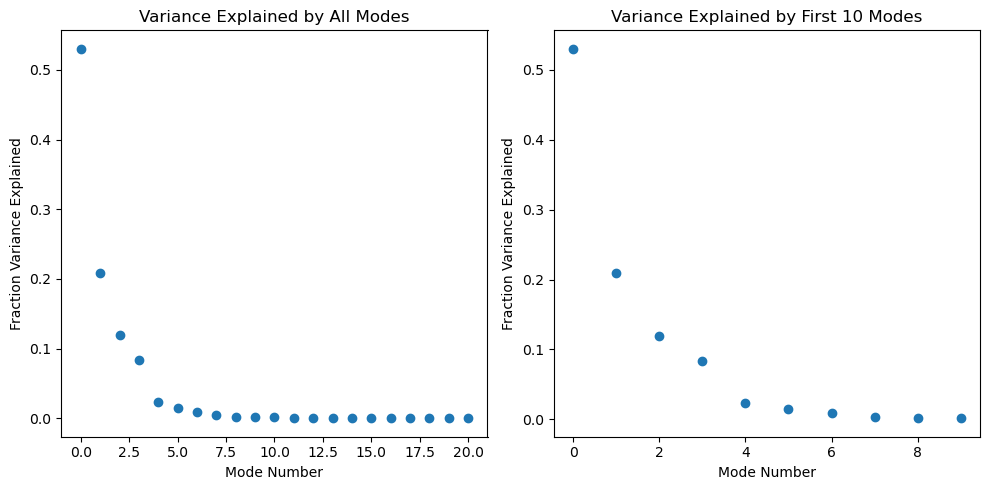

In [59]:
#plot fraction of variance explained by each mode
# pull out ages as array

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

In [60]:
var_exp = fracVar[0] + fracVar[1] + fracVar[2]
var_exp

0.8583838310157916

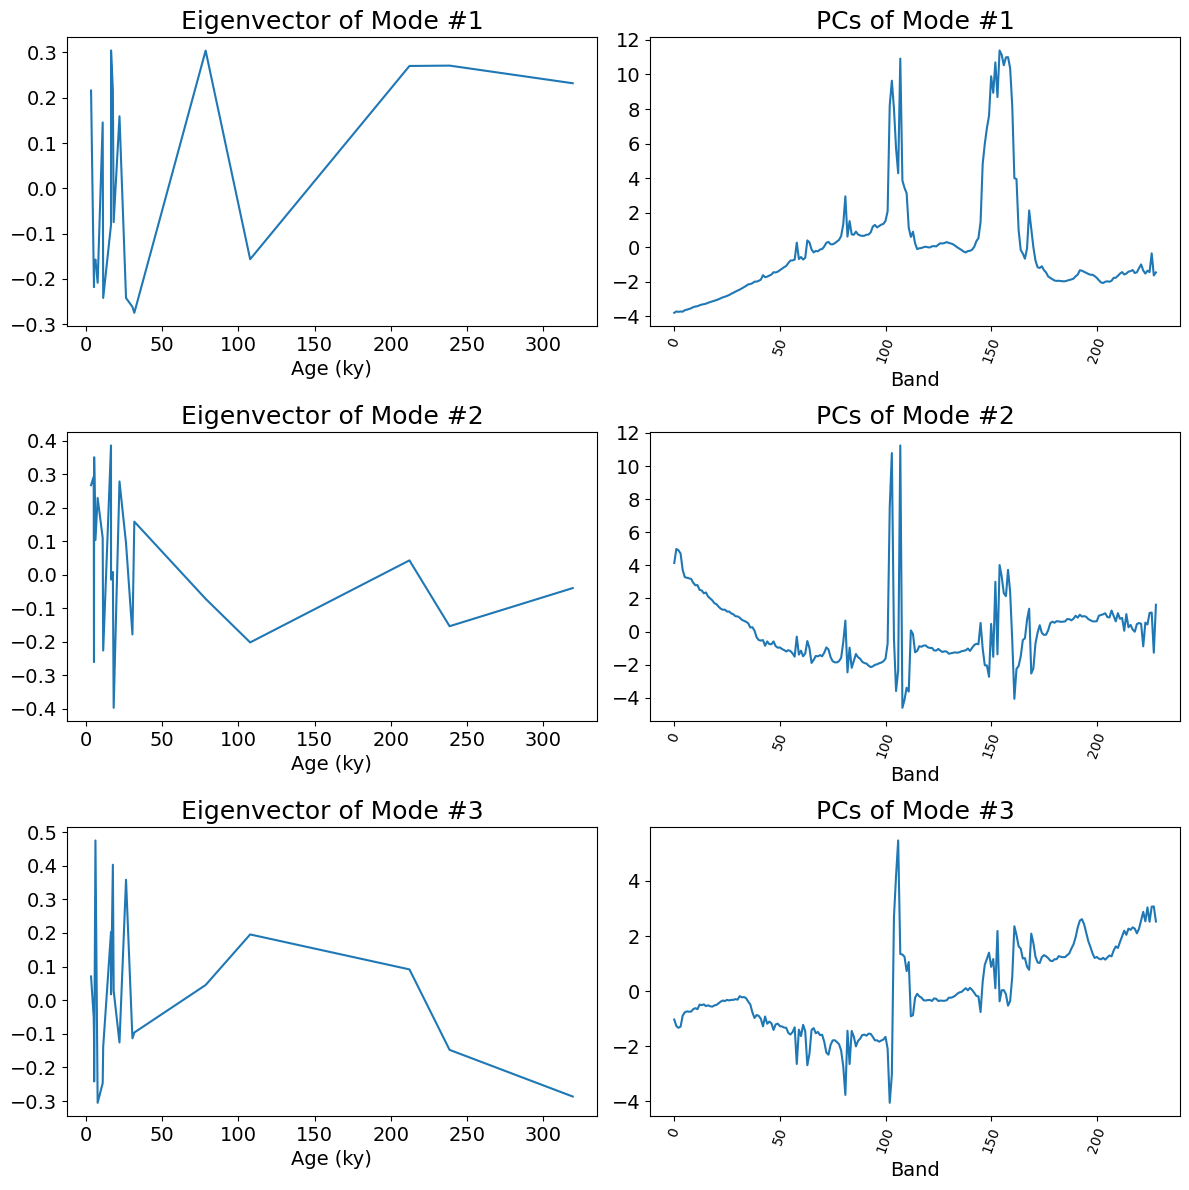

In [63]:
#plot the first n modes and PCs
n = 3

plt.figure(figsize=(12,4*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(ages, eigvecs[kk,:]) # extrat ages as an array and do plt.plot(PCs[:,kk], ages)
    plt.title('Eigenvector of Mode #' + str(kk+1), fontsize = 18)
    plt.xlabel('Age (ky)', fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk]) 
    plt.title('PCs of Mode #' + str(kk+1), fontsize = 18)
    plt.xlabel('Band', fontsize = 14)
    plt.xticks(fontsize = 14, rotation=70, size = 10)
    plt.yticks(fontsize = 14)
    
    plt.tight_layout()
    
    
plt.show()

In [ ]:
### Remember that our eigenvectors should be orthogonal and timeseries should be uncorrelated
### Let's check that. Two vectors are orthogonal if their dot product is zero
print(np.dot(eigvecs[0,:],eigvecs[1,:]))
print(np.dot(eigvecs[1,:],eigvecs[2,:]))
print(np.dot(eigvecs[2,:],eigvecs[0,:]))


In [ ]:
### Similarly, we can check the covariance between the timeseries (should be 0)
print(np.cov(PCs[:,0],PCs[:,1])[0,1])
print(np.cov(PCs[:,1],PCs[:,2])[0,1])
print(np.cov(PCs[:,2],PCs[:,0])[0,1])

In [26]:
pca = PCA(n_components= 3)
PCs = pca.fit_transform(data)
y_rec = pca.inverse_transform(PCs)

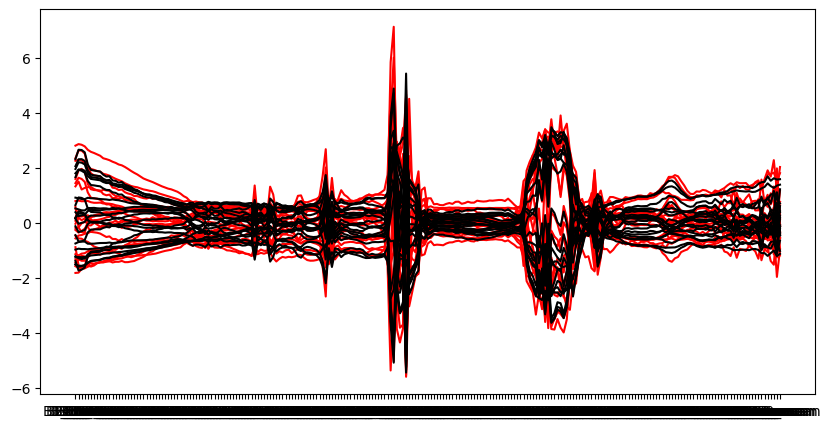

In [27]:
# plot raw normalized data

fig = plt.figure(figsize = (10,5))
#plt.plot(data.T, color = 'red')
plt.plot(data, color = 'red')
plt.plot(y_rec, color = 'black')

plt.show()

In [ ]:
# plot y_rec data
fig = plt.figure(figsize = (10,5))
plt.plot(y_rec.T, color = 'black')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

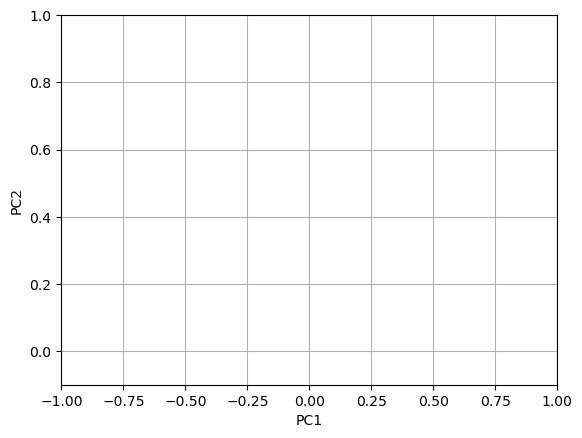

In [28]:

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-.1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

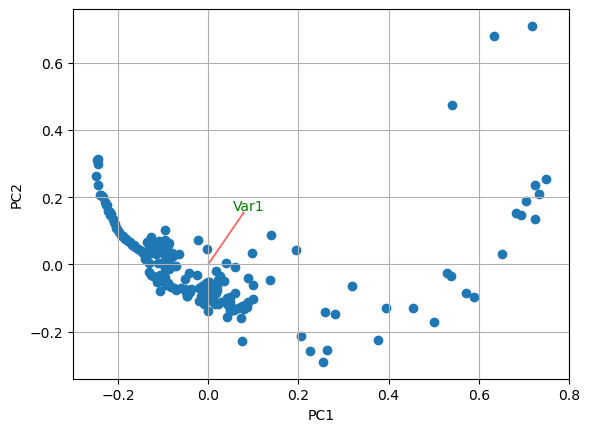

In [57]:
score = PCs
coeff = eigvecs

#Call the function. Use only the 2 PCs.
myplot(PCs[:,0:2],np.transpose(eigvecs[:,108:109]))

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

In [50]:
k = 23
A = eigvecs[1]
idx = np.argpartition(A, k)
C = A[idx[:k]]
print(C)

B = np.array(eigvecs[1])
print(B < -0.2)

np.argwhere(B < -0.2)

[-0.36166934 -0.34486096 -0.23680114 -0.11903754 -0.15399567 -0.10822315
 -0.10712856 -0.10593013 -0.10486936 -0.097356   -0.09262831 -0.09296226
 -0.0835974  -0.08238203 -0.16023709 -0.1346533  -0.12212314 -0.16255922
 -0.09726998 -0.12802891 -0.10592538 -0.07855306 -0.07689018]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False  True
 False False False False False False False False False False F

array([[102],
       [103],
       [107]], dtype=int64)

In [ ]:
np.where(A > .05)[0][0] 

In [ ]:
band_list = list(data.columns.values)

In [53]:
# number of components
n_pcs= PCs.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(eigvecs[i]).argmax() for i in range(n_pcs)]
least_important = [np.abs(eigvecs[i]).argmin() for i in range(n_pcs)]

initial_feature_names = list(data.columns.values)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
least_important_names = [initial_feature_names[least_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic_most = {'PC{}_most'.format(i): most_important_names[i] for i in range(n_pcs)}
dic_least = {'PCl{}_least'.format(i): least_important_names[i] for i in range(n_pcs)}

# build the dataframe
most = pd.DataFrame(dic_most.items())
least = pd.DataFrame(dic_least.items())


IndexError: index 21 is out of bounds for axis 0 with size 21

In [ ]:
most.head()

In [ ]:
least.head()

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]

N = 28
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.PiYG(np.linspace(0,1,N)))

fig, ax = plt.subplots()
for i in range(N):
    ax.plot(norm_same_band_across.T.iloc[i], label = norm_same_band_across.T.index.values.astype(float)[i]) 

#plt.legend(loc = 'right')
plt.xlabel('Band', fontsize = 14)
plt.xticks(fontsize = 10, rotation=70, size = 8)
plt.yticks(fontsize = 14)
    
# get legend location
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='lower left', bbox_to_anchor=(1, 0),
          fancybox=True, shadow=True, ncol=1)

plt.show()